In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("SalaryData_Train.csv")
test_data = pd.read_csv("SalaryData_Test.csv")

combined_data = pd.concat([train_data, test_data], ignore_index=True)

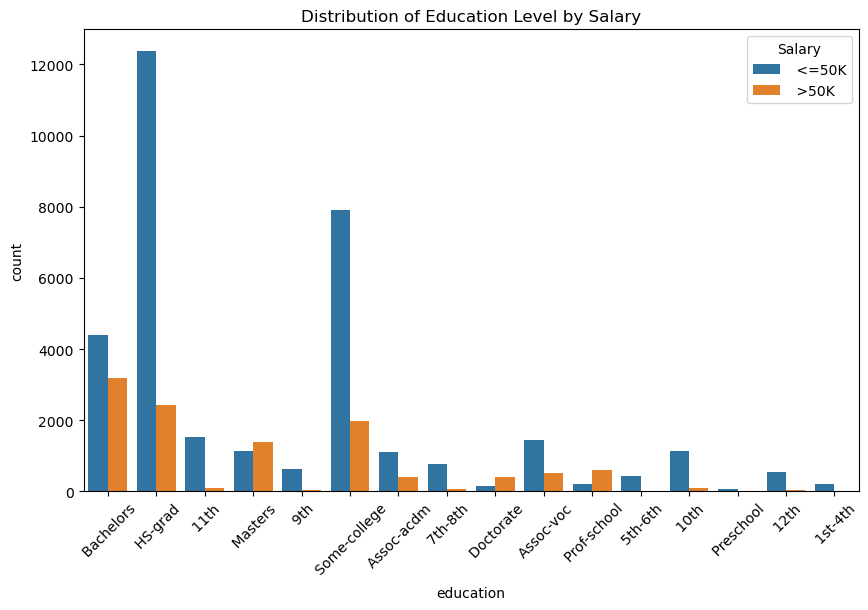

In [2]:
# Data Exploration
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='Salary', data=combined_data)
plt.title('Distribution of Education Level by Salary')
plt.xticks(rotation=45)
plt.show()

In [3]:
# Data preprocessing
combined_data = combined_data.dropna()
#test_data = test_data.dropna()

# Data preprocessing for training set
le = LabelEncoder()
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

for column in categorical_columns:
    combined_data[column] = le.fit_transform(combined_data[column])

# Select features and target variable for training set
X_train = combined_data.drop('Salary', axis=1)
y_train = combined_data['Salary']

# Split the training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [4]:
# Initialize the Naive Bayes model
model = GaussianNB()

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10204
           1       0.68      0.31      0.43      3363

    accuracy                           0.79     13567
   macro avg       0.74      0.63      0.65     13567
weighted avg       0.78      0.79      0.76     13567



In [5]:
salary_mapping = {0: '<=50K', 1: '>50K'}

temp_y_test = y_test.map(salary_mapping)
temp_y_pred = pd.Series(y_pred)
temp_y_pred = temp_y_pred.map(salary_mapping)

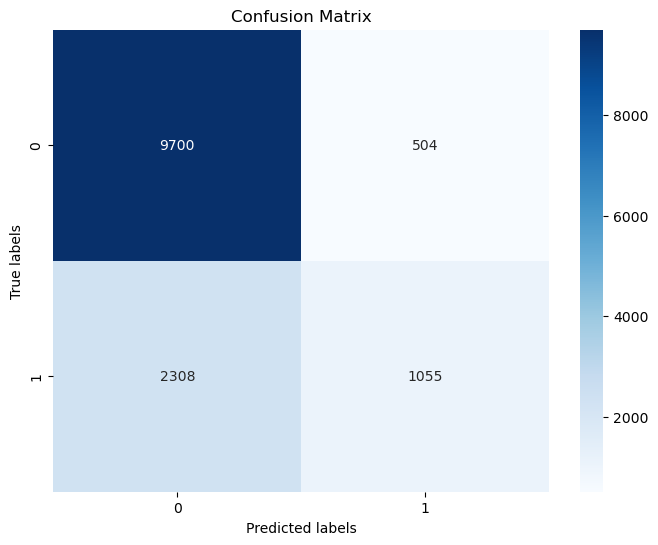

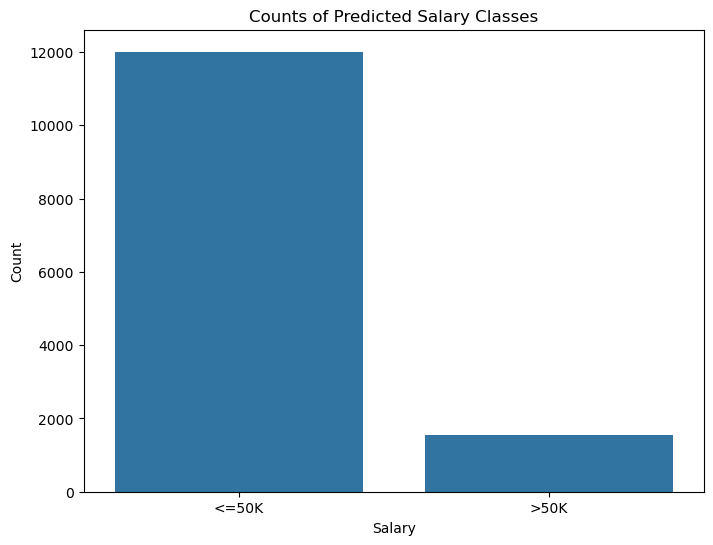

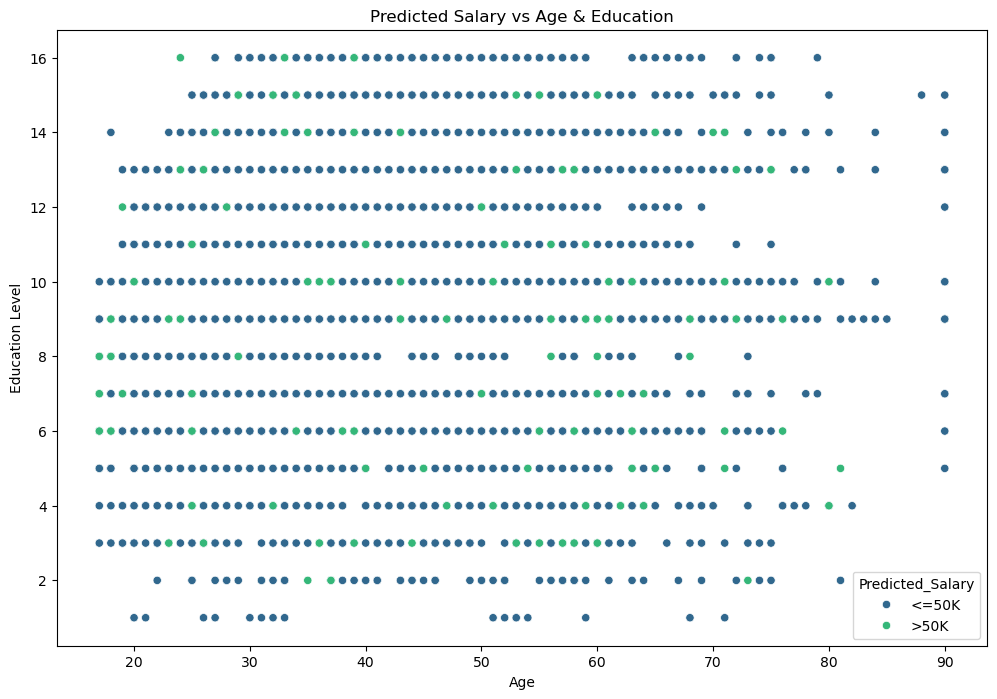

In [6]:
# Model Evaluation
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(temp_y_test, temp_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Prediction Analysis
# Counts of Predicted Salary Classes
combined_data['Predicted_Salary'] = temp_y_pred

plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted_Salary', data=combined_data)
plt.title('Counts of Predicted Salary Classes')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='educationno', hue='Predicted_Salary', data=combined_data, palette='viridis')
plt.title('Predicted Salary vs Age & Education')
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.show()